**1.DEFINING THE QUESTION**

**a).Specifying the question**

1.Investigating the usage of electric cars(bluecars) in Paris

2.Finding out if there is a difference on Blue cars taken on two different postals codes(sampled randomly)during weekdays.(This will be done on hypothesis testing)

**c).Understanding the context**

Autolib is an electric car shairing service that was started in Paris,France in 2011.The autolib has a fleet of cars for public use and subscriptions were being paid for n order to use the cars.

**d).Recording the Experimental Design**


We will follow the following steps during our analysis;

1.Defining the Question.

2.Reading the Data.

3.Checking the data. 

4.Data Cleaning.

5.Exploratory Data analysis (Performing Univariate and Bivariate Analysis)

6.Hypothesis Testing.

7.Point estimation

8.Confidence interval.

**2.READING THE DATA**

**Importing the Libraries**

In [103]:
#Importing the relevant libraries for our analysis.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport
from scipy import stats
from scipy.stats import norm
from scipy.stats import t
import math
from scipy.stats import ttest_ind
import statsmodels.api as sm

**Loading the Datasets**

In [8]:
#Loading the columns explanation(excel) for our dataset

column_exp=pd.read_excel('/content/columns_explanation.xlsx')
column_exp

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [9]:
#Loading our dataset
#url='/content/autolib_daily_events_postal_code - Copy.csv'
df=pd.read_csv('/content/autolib_daily_events_postal_code.csv')


In [10]:
#Previewing the first entries of our dataset
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [11]:
#previewing the last 5 entries of our dataset
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


**Checking the dataset**

In [12]:
#checking the number of columns and rows in our dataset
df.shape

(16085, 13)

In [13]:
#checking our datataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [14]:
#Checking if the columns have the correct datatypes
df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [15]:
#checking the summary statistics of the dataset
df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [16]:
#checking the columns in our dataframe
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

**DATA CLEANING**

In [17]:
#Checking for duplicates in the dataset rows
df.duplicated().sum()

#we did not have any diplicated values in our dataset

0

In [18]:
#removing the spaces between the column names and changing the names to lowercase
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [19]:
#droppng the columns that we wont need for the analysis


df.drop(['utilib_taken_sum','utilib_returned_sum', 'utilib_14_taken_sum',
               'utilib_14_returned_sum'], axis = 1, inplace = True)


In [21]:
#confirming that the unnecesaary columns have been dropped
df.columns


Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'slots_freed_sum',
       'slots_taken_sum'],
      dtype='object')

In [23]:
#checking for null values
df.isnull().sum()

#our dataset did not have any null values

postal_code              0
date                     0
n_daily_data_points      0
dayofweek                0
day_type                 0
bluecars_taken_sum       0
bluecars_returned_sum    0
slots_freed_sum          0
slots_taken_sum          0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


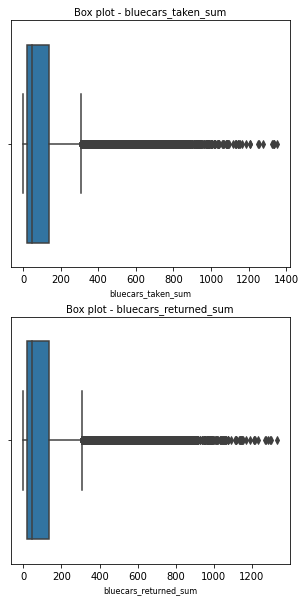

In [24]:
# Checking for Anomalies

# Checking for outliers in the columns with numerical data
col_names = ['bluecars_taken_sum','bluecars_returned_sum']

fig, ax = plt.subplots(len(col_names), figsize=(5,10))

for i, col_val in enumerate(col_names):
    sns.boxplot(df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

our dataset has a number of outliers but we decided not to drop them as it wil afect our analysis results

**Exploratory Data Analysis**

**Univariate Analysis**

In [34]:
#describing our dataset to get the mean standard deviation,minimum value and quantile range
df.describe()

,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,360.000000,359.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


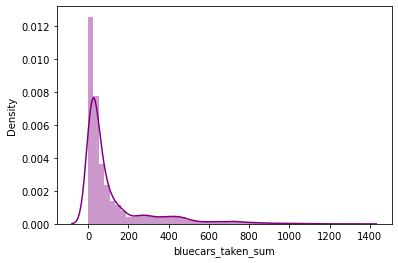

In [25]:

#plotting a histogram to to show the distribution of bluecars_taken_sum

sns.distplot(df['bluecars_taken_sum'], kde=True, color = 'purple')

# the histogram shows that the bluecars_taken_sum distribution is skewed to the right
# meaning that the mean is greater than the mode

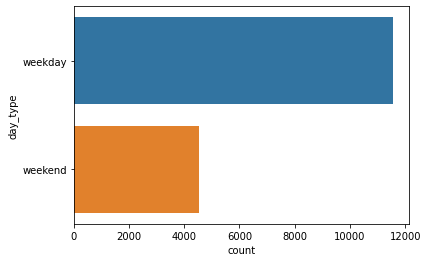

In [26]:
#plotting a chart to show comparison of blue car usage between weekdays and weekend
sns.countplot(y='day_type', data=df)

# from the bar chart above we can conclude that blue cars are used more on weekdays than on weekends

In [32]:

#using measures of central tendency to prove the skewness of the histogram above
 
# Finding  mean
print(df["bluecars_taken_sum"].mean())

#finding the mode
print(df["bluecars_taken_sum"].mode())

# from the output the mean of bluecars_taken_sum is greater than the mode

125.92695057506994
0    12
dtype: int64


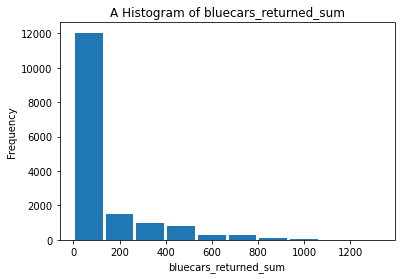

In [30]:
#plotting a histogram to show the distribution of bluecars_returned_sum

house = df['bluecars_returned_sum']
plt.hist(house, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('bluecars_returned_sum')
plt.ylabel('Frequency')
plt.title('A Histogram of bluecars_returned_sum')
plt.show()

# the histogram shows the bluecars_returned_sum distribution is skewed to the right meaning that the mean is greater than the mode

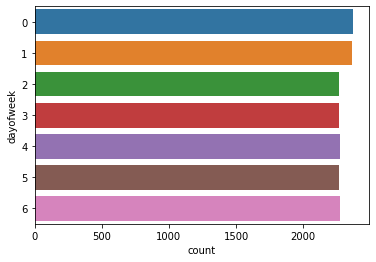

In [39]:
#a histogram showing distribution during weekday
sns.countplot(y='dayofweek',data=df)


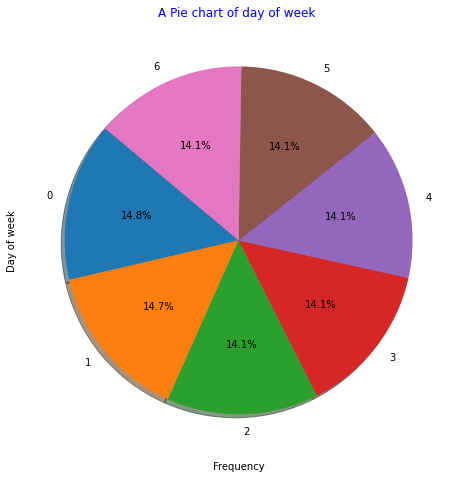

In [42]:
#plotting a pie chart to show which weekday is the busiest
busy = df.groupby(['dayofweek']).count().reset_index()
x = busy['bluecars_taken_sum'] 
labels = busy['dayofweek']

plt.pie(x, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.ylabel("Day of week")
plt.xlabel('Frequency')
plt.title("A Pie chart of day of week ", color = 'blue')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

In [43]:

# Generating a frequency table of the daily data points in stations
# 
pd.crosstab(index=df.n_daily_data_points , columns='count')
# from the table
# 1440 was the most frequent number of daily data points 

col_0,count
n_daily_data_points,
1174,104
1203,103
1318,103
1320,103
1364,103
1370,94
1377,102
1380,103
1389,103



From our Univariate Analysis, we can conclude that there is more blue car usage during the weekdays than on weekend, therefore the company should ensure that resources (cars, parking and charging slots) are always available during these days.

**Bivariate Analysis**

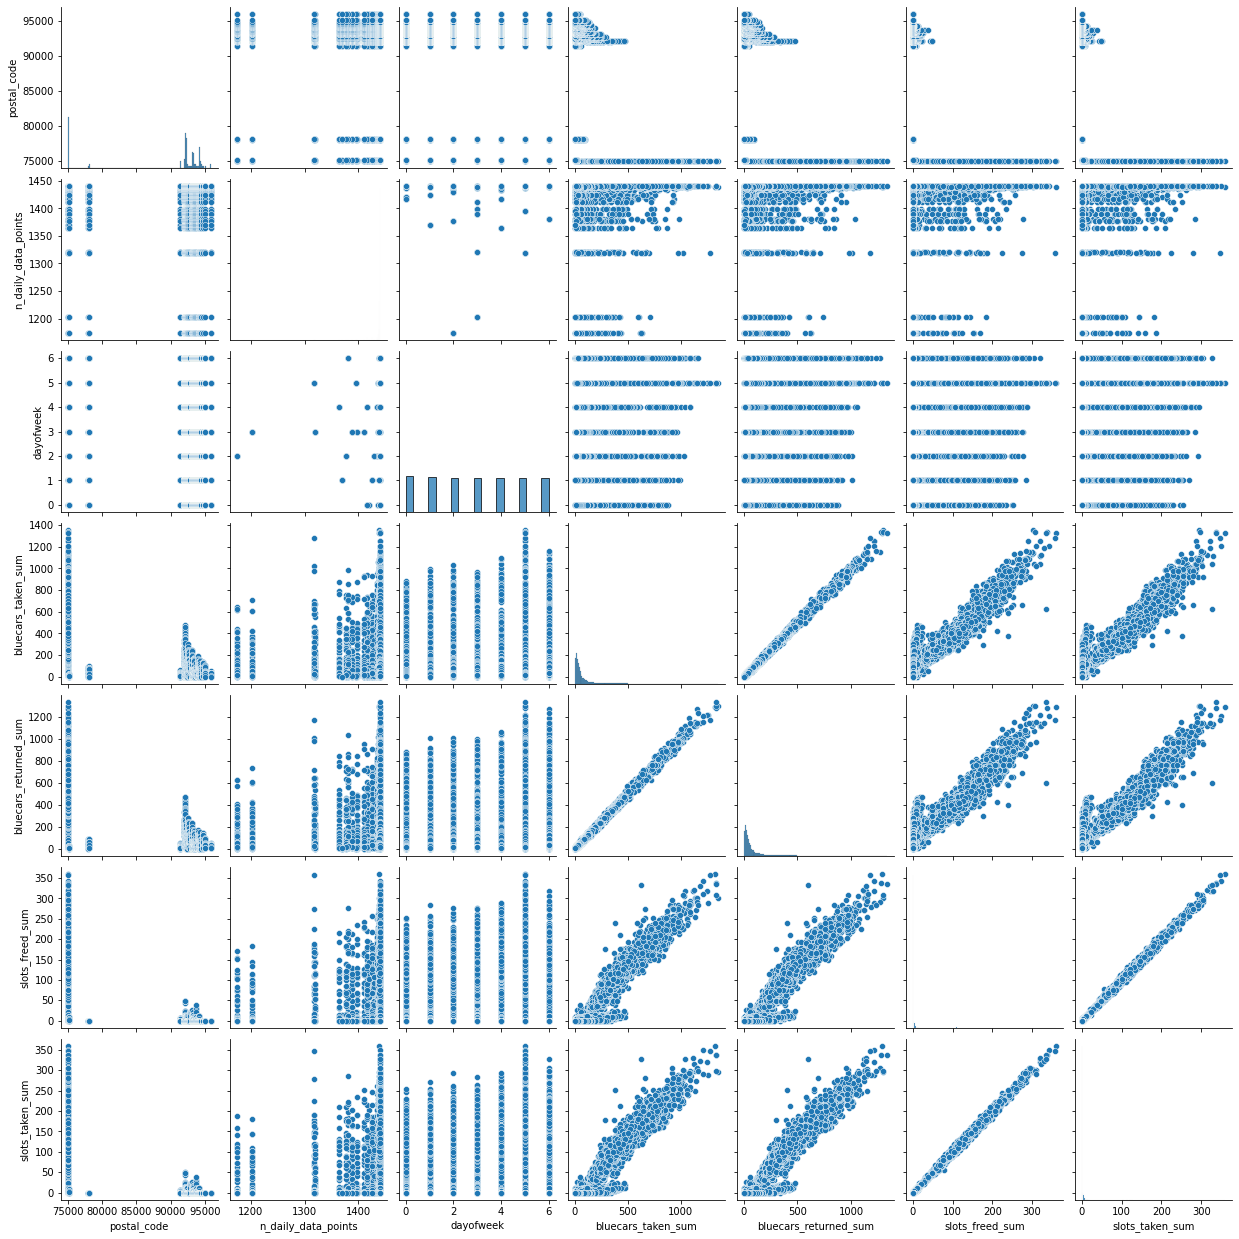

In [44]:
#Ploting the bivariate summaries and recording our observations
sns.pairplot(df)
plt.show()

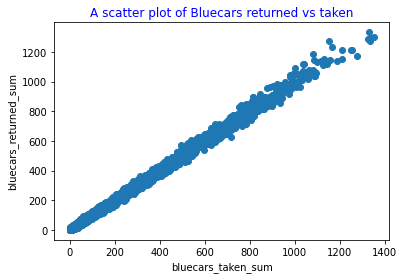

In [45]:
#Using Matplotlib: Plotting our scatterplot to compare numerical variables
plt.scatter(df["bluecars_taken_sum"] , df["bluecars_returned_sum"])

# Giving the scatterplot a title
plt.title('A scatter plot of Bluecars returned vs taken', color = 'blue')

# Labelling the x axis
plt.xlabel('bluecars_taken_sum')

# Labelling the y axis
plt.ylabel('bluecars_returned_sum')

# We then display our scatterplot 
plt.show()

# the plot shows there is a strong positive correlation between blue cars taken and returned.


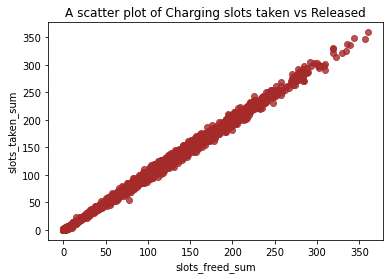

In [46]:

# Or Using Seaborn: Using the function regplot to create our scatterplot
sns.regplot(x = df["slots_freed_sum"], y = df["slots_taken_sum"], fit_reg=False,
            color = 'brown')

# Giving our scatterplot a title
plt.title('A scatter plot of Charging slots taken vs Released')

# Labelling our x axis
plt.xlabel('slots_freed_sum')

# Labelling our y axis
plt.ylabel('slots_taken_sum')

# We then display our scatterplot as shown below
plt.show()
#the plot shows there is a strong positive correlation between slots taken and freed.

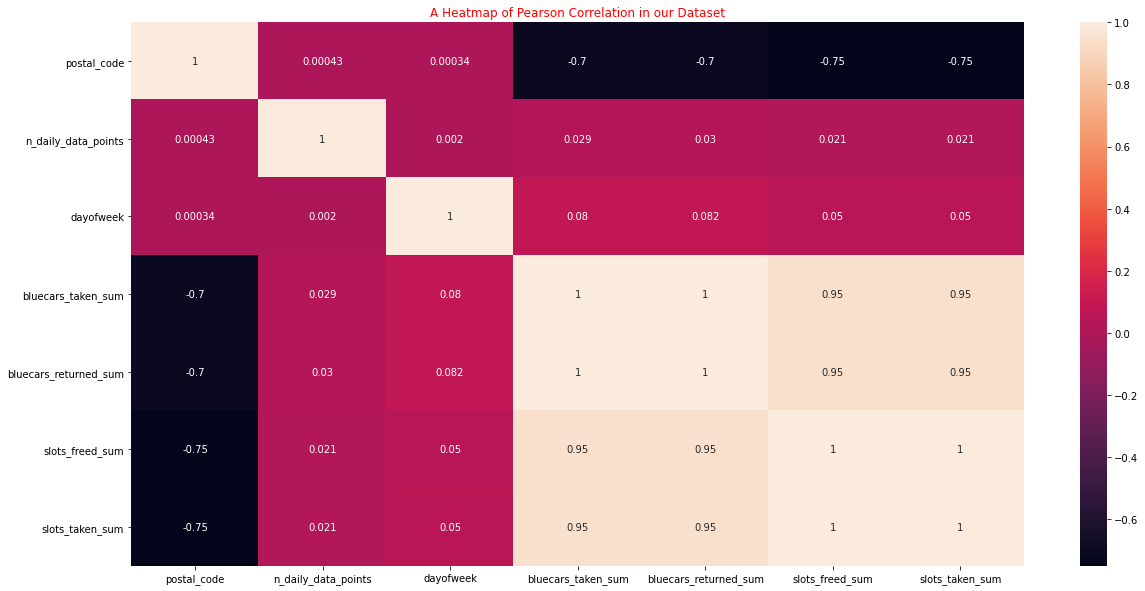

In [47]:

# Calculating the pearson coefficient
a = df.corr() 
plt.figure(figsize = (20,10))
sns.heatmap(a, xticklabels=a.columns, yticklabels=a.columns,annot=True)
plt.title('A Heatmap of Pearson Correlation in our Dataset', color='red')
plt.show()

# There is a perfect positive correlation between blue cars taken and returned.
# also,there is a perfect positive correlation between slots freed and taken.


From the bivariate analysis we see that:

There is a perfect positive correlation between blue cars taken and returned
There is a perfect positive correlation between slots freed and taken.

This means that: the higher the number of blue cars taken, the higher the number of blue cars returned. Consequently, the higher the number of slots freed, the higher the number of slots taken.

**Hypothesis Testing**


we are testing whether there is a difference between the means of blue cars taken from 2 different postal codes

In [52]:
#sampling random 2 postal codes from our dataframe

sample = df.sample(n=2, replace = False)
sample

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
1993,75013,5/5/2018,1440,5,weekend,651,621,177,174
6377,92220,6/4/2018,1440,0,weekday,58,52,4,4



Steps to be followed during hypothesis testing;

Step 1: Formulate the null hypothesis and the alternative hypothesis

Step 2: Identify a test statistic and significance level that can be used to assess the truth of the null hypothesis.

Step 3: Computing the test-statistic and P-value. The smaller the P-value, the stronger the evidence against the null hypothesis.

Step 4: Analyze the results and either accept or reject the null hypothesis.

Step 5: Interpreting the Results

In [92]:

s1 = df[df['postal_code'] == 75014]
s1

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
2028,75014,1/1/2018,1440,0,weekday,475,478,121,116
2029,75014,1/2/2018,1438,1,weekday,353,338,80,85
2030,75014,1/3/2018,1439,2,weekday,454,459,120,116
2031,75014,1/4/2018,1320,3,weekday,360,367,88,94
2032,75014,1/5/2018,1440,4,weekday,448,430,132,124
...,...,...,...,...,...,...,...,...,...
2179,75014,6/15/2018,1440,4,weekday,516,496,149,148
2180,75014,6/16/2018,1440,5,weekend,616,613,182,176
2181,75014,6/17/2018,1440,6,weekend,631,650,179,184
2182,75014,6/18/2018,1440,0,weekday,391,393,123,119


In [94]:

s2 = df[df['postal_code'] == 94130]
s2

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
13590,94130,1/1/2018,1440,0,weekday,42,45,0,0
13591,94130,1/2/2018,1438,1,weekday,37,35,0,0
13592,94130,1/3/2018,1439,2,weekday,37,39,0,0
13593,94130,1/4/2018,1320,3,weekday,30,28,0,0
13594,94130,1/5/2018,1440,4,weekday,48,39,0,0
...,...,...,...,...,...,...,...,...,...
13741,94130,6/15/2018,1440,4,weekday,71,76,0,0
13742,94130,6/16/2018,1440,5,weekend,72,71,0,0
13743,94130,6/17/2018,1440,6,weekend,74,67,0,0
13744,94130,6/18/2018,1440,0,weekday,23,29,0,0


In [95]:
#since our population of the two postal code is relatively small i.e. 112 rows
# we will choose a sample size of 20 
sample1 = s1['bluecars_taken_sum'].sample(n=20, random_state=1)
sample1
sample2 = s2['bluecars_taken_sum'].sample(n=20, random_state=1)
sample2

13707    45
13665    19
13641    28
13621    26
13625    19
13630    44
13604    37
13699    30
13643    24
13736    69
13740    36
13668    24
13682    38
13680    19
13679    28
13595    61
13713    23
13606    32
13609    63
13619    35
Name: bluecars_taken_sum, dtype: int64

In [ ]:
# We choose a significance level of 0.05 
# since it is the most commonly used in statistical test
# since our sample size is less than 30, we will perform a ttest

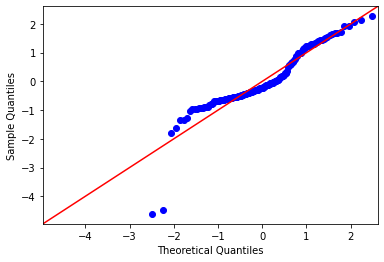

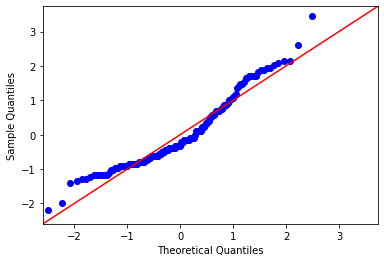

In [101]:
#ceck for normality
#sample normality test
import statistics
import statsmodels.api as sm
# to perform a ttest, we needto satisfy another condition, 
# which is that the samples were normally distibuted
# let us evaluate 

# a qq plot of sample 1
fig = sm.qqplot(s1['bluecars_taken_sum'], fit = True, line= '45')
plt.show()

# a qq plot of sample 2
fig = sm.qqplot(s2['bluecars_taken_sum'], fit = True, line= '45')
plt.show()

In [104]:

# let us perfrom our ttest
tstat, pval = stats.ttest_rel(sample1, sample2)
print('t statistic is: ', tstat)
print('p value is: ', pval)

t statistic is:  27.89841085633017
p value is:  6.985978734098666e-17


In [105]:

# let us use a loop to analyse our results
if pval<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Reject null hypothesis



Interpreting the Results

Rejecting the null hypothesis means that, we have enough statistical evidence to state that, There is a statistical significant difference between the mean of blue cars taken in postal code 75014 and 94130

**Point Estimation**

In [110]:

# Calculating the population mean of the least popular postal code
333

a = s1['bluecars_taken_sum'].mean()
a

486.29487179487177

In [112]:
# Showing sample mean of the least popular postal code
b=  sample1.mean()
b

479.45

In [115]:
#calculating the population mean for the most popular postal code

c=s2['bluecars_taken_sum'].mean()
c

38.36538461538461

In [116]:
#calculating the saple mean for the most popular postal code

d=sample2.mean()
d

35.0

In [117]:

# A point estimate for the difference in two population means 
# is simply the difference in the corresponding sample means.
point_estimate = sample1.mean()-sample2.mean()
point_estimate

444.45

The average number of bluecars taken from postal code 75014 is 444.45 points higher than it is for the average number of bluecars taken from postal code 94130

**Confidence Interval**

In [125]:
#for our 75014 postal code
# Calculating the sample mean of final data
#
mean = sample['bluecars_taken_sum'].mean() 

# calculating the sample size
#
size = sample['bluecars_taken_sum'].shape[0]
size

# Finding the standard error of the mean of data 
#
std = sample['bluecars_taken_sum'].std() / np.sqrt(size)
std

# Calculating the 95% Confidence Interval  

stats.norm.interval(0.95, loc=mean, scale=std)

# We can be 95% certain that the population mean data is between 433.62 and 455.98
# our sample mean of bluecars taken for postal code 75014 which is 443.04
# which lies within this interval


(nan, nan)

In [129]:
#for our 75014 postal code
# Calculating the sample mean of final data
#
mean = s1['bluecars_taken_sum'].mean() 

# Finding the sample size
#
size = s1['bluecars_taken_sum'].shape[0]
size

# Finding the standard error of the mean of data 
#
std = s1['bluecars_taken_sum'].std() / np.sqrt(size)
std

# Calculating the 95% Confidence Interval for mean data 
# To calculate the confidence interval, we will use the norm object from the statssubpackage. 
# The norm object has an interval() method that receives three inputs 
# – our chosen confidence interval 0.95, and the sample mean and standard error of the mean.  
# 
stats.norm.interval(0.95, loc=mean, scale=std_error)

# We can be 95% certain that the population mean data is between 433.62 and 455.98
# our sample mean of bluecars taken for postal code 75014 which is 443.04
# which lies within this interval


(470.6239447492206, 501.96579884052295)

In [131]:

# Calculating the sample mean of for 94130 postal code
#
mean1 = s2['bluecars_taken_sum'].mean() 

# Finding the sample size
#
size1 = s2['bluecars_taken_sum'].shape[0]
size1

# Finding the standard error of the mean of data 
#
se = s2['bluecars_taken_sum'].std() / np.sqrt(size)
se

stats.norm.interval(0.95, loc=mean1, scale=se)

# We can be 95% certain that the population mean data is between 35.76 and 41.10
# our sample mean of bluecars taken for postal code 94130 is 30.16
# which lies within this interval

(35.73526807412304, 40.995501156646185)

**Implementing the solution**

From our univariate analysis we can conclude that weekdays are quite busy comared to weekends .We recommend that the autolib company ensues that the rsources are are available during the weekdays.

From our bivariate analysis thers is perfect correlation between bluecars taken and blue cars returned

From our hypothesis testing 
Rejecting the null hypothesis means that, we have enough statistical evidence to state that, There is a statistical significant difference between the mean of blue cars taken in postal code 75014 and 94130